# <h1 style='background:#DCB778; border:0; color:black'><center>RAIN PREDICTION IN AUSTRALIA</center></h1> 
![Memphis%20Stop%20Start%20Continue%20Brainstorm%20Presentation%20%281%29.png](https://i.guim.co.uk/img/media/b820f307d19602b317052310596b47a653ec0f3f/0_0_1499_1029/master/1499.jpg?width=620&quality=45&dpr=2&s=none)

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#DCB778; border:0; color:black'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)  

[3. DATA CONTENT](#3)

[4. EXPLORATORY DATA ANALYSIS](#4)

[5. DATA VISUALIZATION AND CLEANINGS](#5)

[6. OUTLIER DETECTON](#6)

[7. DATA PREPROCESSING](#7)     

[8. MODEL BUILDING AND TRAINING](#8) 
   
[9. MODEL EVALUATION](#9)

[10. CONCLUSION](#10)



        
 <a id="1"></a>
<h1 style='background:#DCB778; border:0; color:black'><center>LIBRARIES</center></h1> 



### [1. IMPORTING LIBRARIES](#1)

In [221]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import callbacks
import warnings
warnings.filterwarnings("ignore")

### [2. LOADING DATA](#2)

In [222]:
# loading dataset
data=pd.read_csv("weatherAUS.csv")
df=data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### [3. DATA CONTENT](#3)

<h1 style='background:#DCB778; border:2; color:black'><center>Feature Attributes</center></h1>

* minTemp: Minimum temperature (°C)
* maxTemp: Maximum temperature (°C)
* Rainfall (mm)
* Evaporation (mm) : evaporation is measured in the open pan and is defined as the depth of water that would evaporate from a free water surface in an open pan of unrestricted area, under the influence of the given weather conditions of a certain place and time.
* Sunshine (hours)
* windGustDir: Direction of strongest wind gust
* windGustSpeed: Speed of strongest wind gust (km/h)
* windDir9am: Wind direction at 9am
* windDir3pm: Wind direction at 3pm
* windSpeed9am: Wind speed at 9am (km/hr)
* windSpeed3pm: Wind speed at 3pm (km/hr)
* humidity9am: Relative humidity at 9am (%)
* humidity3pm: Relative humidity at 3pm (%)
* pressure9am: Atmospheric pressure at 9am (hpa)
* pressure3pm: Atmospheric pressure at 3pm (hpa)
* cloud9am: Fraction of sky obscured by cloud at 9am (oktas)
* cloud3pm: Fraction of sky obscured by cloud at 3pm (oktas)
* temp9am: Temperature at 9am (°C)
* temp3pm: Temperature at 3pm (°C)
* raintoday: Rain today (boolean)
* raintomorrow: Rain tomorrow (boolean)

### [4. EXPLORATORY DATA ANALYSIS](#4)

In [223]:
df.info() # checking data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

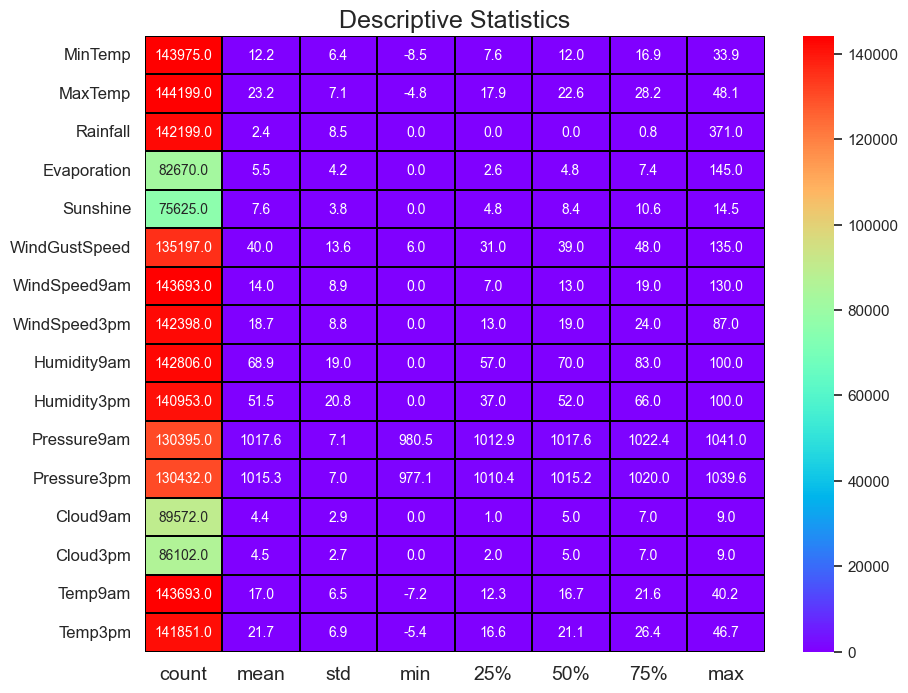

In [224]:
# statistical summary of numerical columns
num_cols = df.select_dtypes(include = np.number).columns
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.50))
    sns.set(style="darkgrid")
    sns.heatmap(desc,
                annot = True,
                cmap = "rainbow",
                fmt= '.1f',
                ax = ax,
                linecolor = 'black',
                linewidths = 1.3,
                cbar = True,
                annot_kws = {"size": 10})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 18)
    plt.show()
    
desc_stats(df[num_cols])

In [225]:
# other version of statistical summary of numerical columns:
import researchpy as rp

num_cols = df.select_dtypes(include = np.number).columns
rp.summary_cont(df[num_cols]) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MinTemp,143975.0,12.1940,6.3985,0.0169,12.1610,12.2271
1,MaxTemp,144199.0,23.2213,7.1190,0.0187,23.1846,23.2581
2,Rainfall,142199.0,2.3609,8.4781,0.0225,2.3169,2.4050
3,Evaporation,82670.0,5.4682,4.1937,0.0146,5.4396,5.4968
4,Sunshine,75625.0,7.6112,3.7855,0.0138,7.5842,7.6382
5,WindGustSpeed,135197.0,40.0352,13.6071,0.0370,39.9627,40.1078
6,WindSpeed9am,143693.0,14.0434,8.9154,0.0235,13.9973,14.0895
7,WindSpeed3pm,142398.0,18.6627,8.8098,0.0233,18.6169,18.7084
8,Humidity9am,142806.0,68.8808,19.0292,0.0504,68.7821,68.9795
9,Humidity3pm,140953.0,51.5391,20.7959,0.0554,51.4306,51.6477


In [226]:
# Confident interval of numerical columns

import statsmodels.stats.api as sms # for trust interval 

num_cols = df.select_dtypes(include = np.number).columns
a=df.dropna()

def conf_int(dataframe):
    for col in num_cols:
        
        print(col,"=>", sms.DescrStatsW(dataframe[col]).tconfint_mean())

conf_int(a)


MinTemp => (13.411821306869252, 13.517717863637658)
MaxTemp => (24.16168636446274, 24.27672554620724)
Rainfall => (2.072513155374887, 2.1882808892901267)
Evaporation => (5.47263498057426, 5.533635845373984)
Sunshine => (7.70461469396476, 7.7666366353510865)
WindGustSpeed => (40.76732850161686, 40.98740386279293)
WindSpeed9am => (15.598598909509072, 15.73585695720486)
WindSpeed3pm => (19.716554696514763, 19.857000780266517)
Humidity9am => (65.72135744440696, 66.02688785867706)
Humidity3pm => (49.43532618125498, 49.76864404207008)
Pressure9am => (1017.1824918916025, 1017.2965190974087)
Pressure3pm => (1014.7388833794033, 1014.8522757840141)
Cloud9am => (4.218623860809285, 4.264786277439563)
Cloud3pm => (4.304671225505286, 4.3483596146223285)
Temp9am => (18.150764233434664, 18.259157780035743)
Temp3pm => (22.653920445286992, 22.766745985056858)


In [227]:
# stats of numerical columns:

# skewness: skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

# if skewness is between -0.5 and 0.5, the data are fairly symmetrical
# if skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# if skewness is less than -1 or greater than 1, the data are highly skewed

# kurtois: kurtois is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

# if kurtosis is between -1 and +1, the distribution is approximately normal
# if kurtosis is between -2 and -1 or between +1 and +2, the distribution is moderately peaked
# if kurtosis is less than -2 or greater than +2, the distribution is highly peaked

import scipy.stats as stats

stats.describe(df[num_cols])

for i in num_cols:
    print(i.upper(),"=>",stats.describe(df[i]))
    print("\n")
    print("************************************")

MINTEMP => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
MAXTEMP => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
RAINFALL => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
EVAPORATION => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
SUNSHINE => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
WINDGUSTSPEED => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


************************************
WINDSPEED9AM => DescribeResult(nobs=145460, minmax=(nan, nan), mean=nan, variance=nan, skewnes

### [5. DATA VISUALIZATION AND CLEANINGS](#5)

In [228]:
# checking missing values
df.isnull().sum() 

# dropping nan values in raintoday and raingtomorrow columns

df.dropna(subset=["RainToday","RainTomorrow"],inplace=True)


In [229]:
# correlation matrix of numerical columns:
px.imshow(df.select_dtypes(include = np.number).corr(),
            labels = dict(x = "Numerical Features",
                            y = "Numerical Features",
                            color = "Correlation Coefficient"),template="plotly_dark",width=800,height=800,
            title = "Correlation Matrix of Numerical Features")

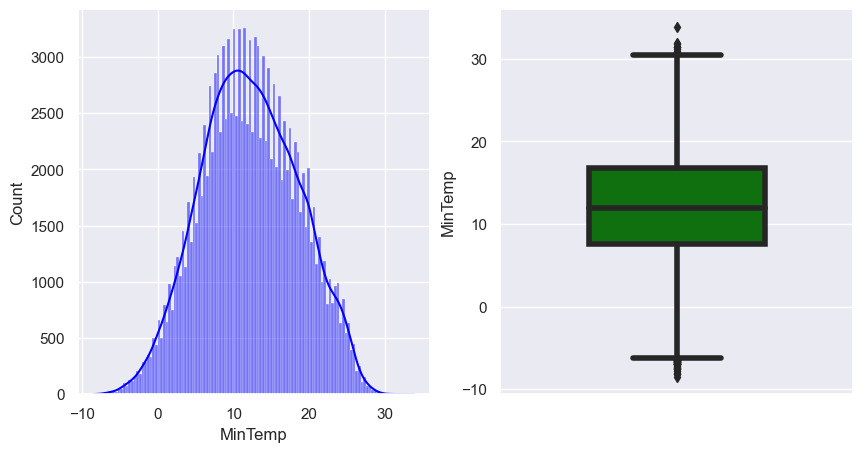

MinTemp: 
  9.6     875
 10.2    873
 11.0    868
 10.5    855
 10.8    854
        ... 
-7.8       1
-7.2       1
-7.1       1
-8.5       1
 30.2      1
Name: MinTemp, Length: 389, dtype: int64


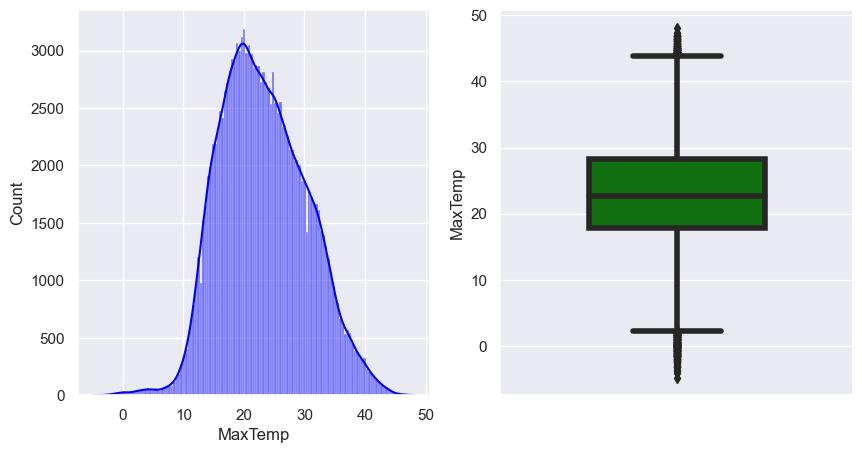

MaxTemp: 
  20.0    857
 19.8    819
 19.0    816
 20.4    806
 19.9    801
        ... 
-2.4       1
 46.6      1
 46.5      1
 46.9      1
-3.8       1
Name: MaxTemp, Length: 503, dtype: int64


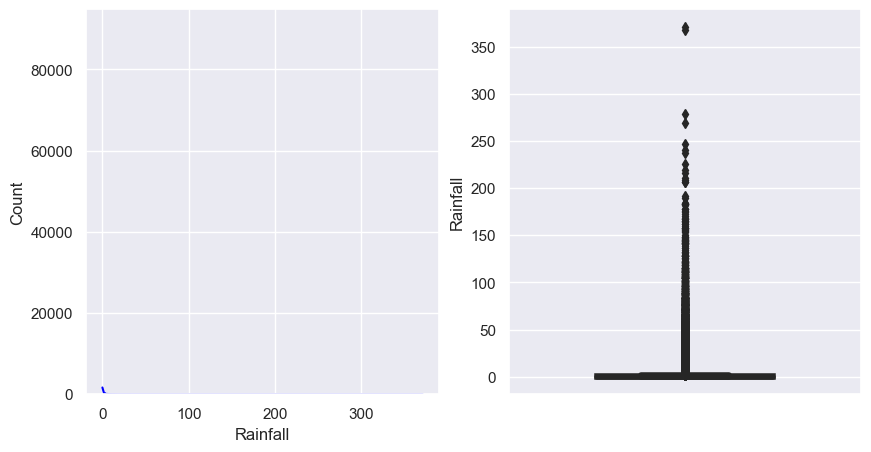

Rainfall: 
 0.0      90275
0.2       8685
0.4       3750
0.6       2562
0.8       2028
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 679, dtype: int64


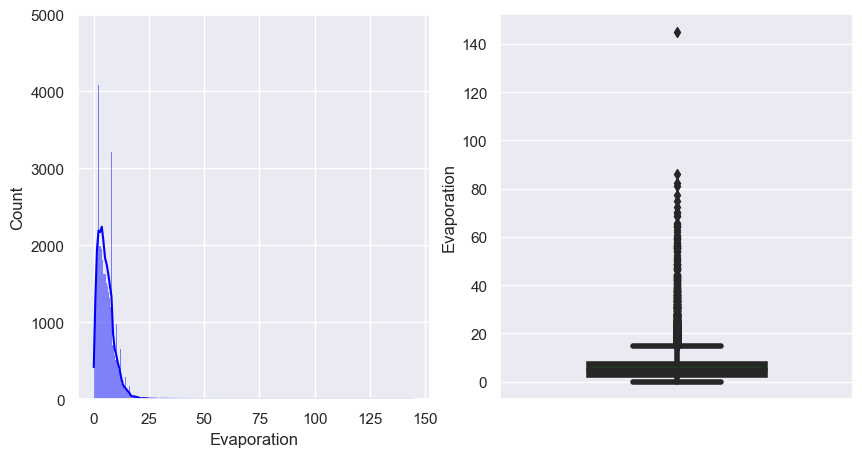

Evaporation: 
 4.0     3271
8.0     2571
2.2     2051
2.0     1993
2.6     1965
        ... 
22.1       1
44.4       1
44.0       1
50.4       1
39.6       1
Name: Evaporation, Length: 355, dtype: int64


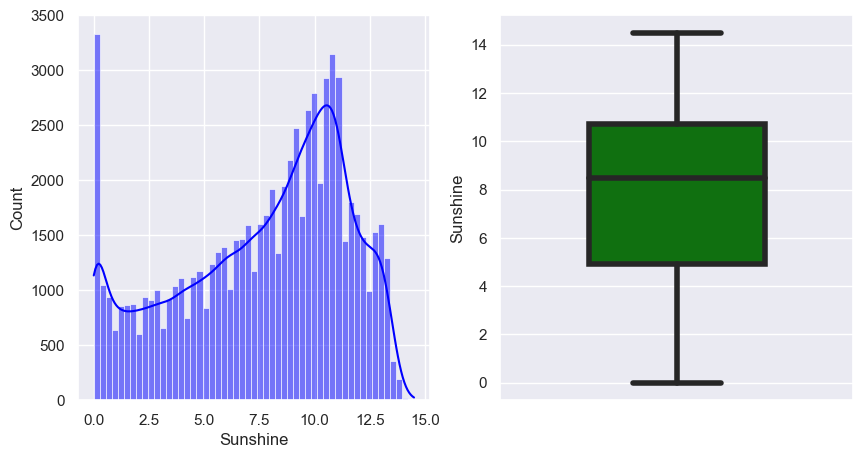

Sunshine: 
 0.0     2299
10.7    1083
11.0    1077
10.8    1057
10.5    1015
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64


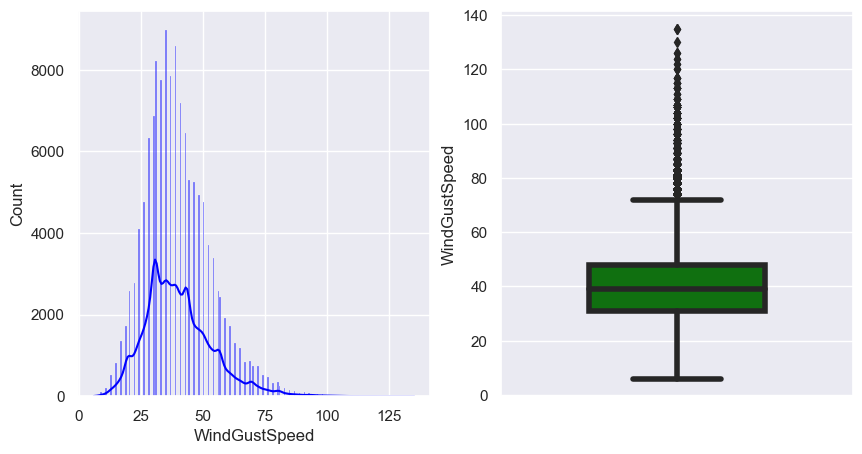

WindGustSpeed: 
 35.0     8988
39.0     8574
31.0     8226
37.0     7842
33.0     7742
         ... 
126.0       2
122.0       2
124.0       2
130.0       1
6.0         1
Name: WindGustSpeed, Length: 67, dtype: int64


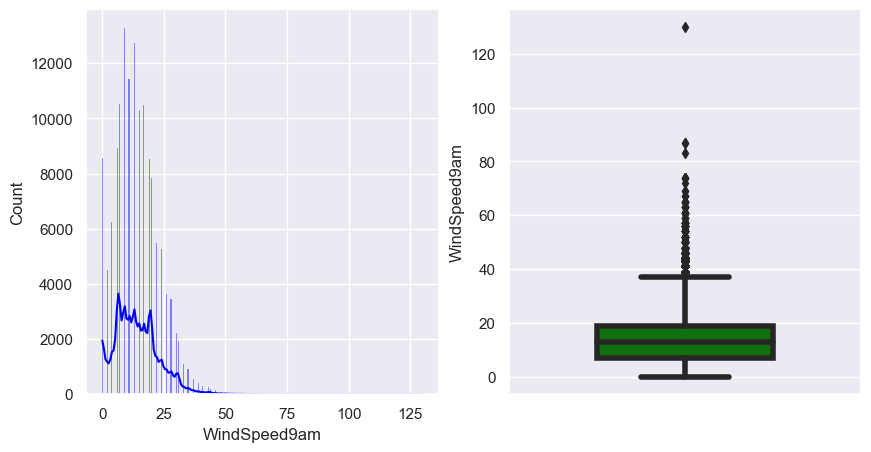

WindSpeed9am: 
 9.0      13291
13.0     12737
11.0     11431
7.0      10506
17.0     10499
15.0     10320
6.0       8939
0.0       8553
19.0      8525
20.0      7851
4.0       6254
22.0      5500
24.0      5261
2.0       4519
26.0      3634
28.0      3453
30.0      2232
31.0      1936
33.0      1087
35.0       919
37.0       570
39.0       425
41.0       314
43.0       256
44.0       187
46.0       162
50.0        85
48.0        83
52.0        62
56.0        41
54.0        36
57.0        19
61.0        11
63.0         8
65.0         7
59.0         5
74.0         4
67.0         3
87.0         2
69.0         2
83.0         1
130.0        1
72.0         1
Name: WindSpeed9am, dtype: int64


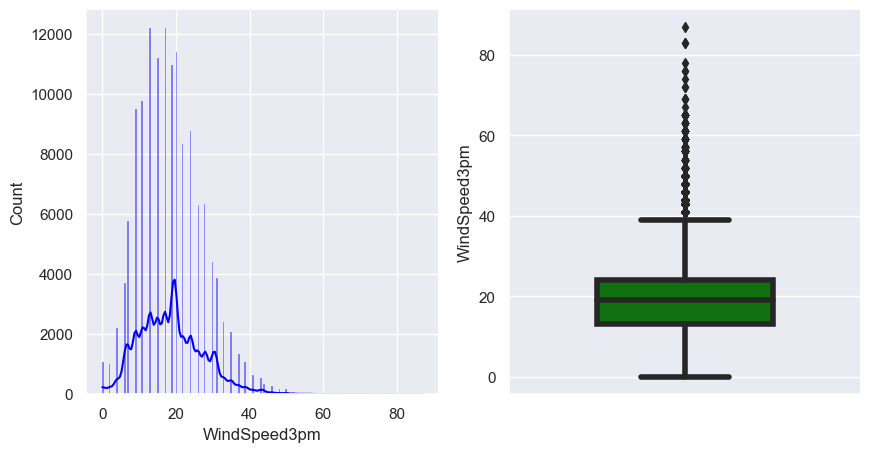

WindSpeed3pm: 
 13.0    12215
17.0    12209
20.0    11385
15.0    11196
19.0    10952
11.0     9760
9.0      9493
24.0     8760
22.0     8330
28.0     6330
26.0     6307
7.0      5763
30.0     4407
31.0     3857
6.0      3704
33.0     2422
4.0      2198
35.0     2069
37.0     1327
0.0      1088
39.0     1065
2.0       999
41.0      628
43.0      538
44.0      333
46.0      276
50.0      175
48.0      169
52.0       84
54.0       57
56.0       53
57.0       26
59.0       20
61.0       18
65.0       17
63.0       13
69.0        3
72.0        2
76.0        2
83.0        2
74.0        1
78.0        1
87.0        1
67.0        1
Name: WindSpeed3pm, dtype: int64


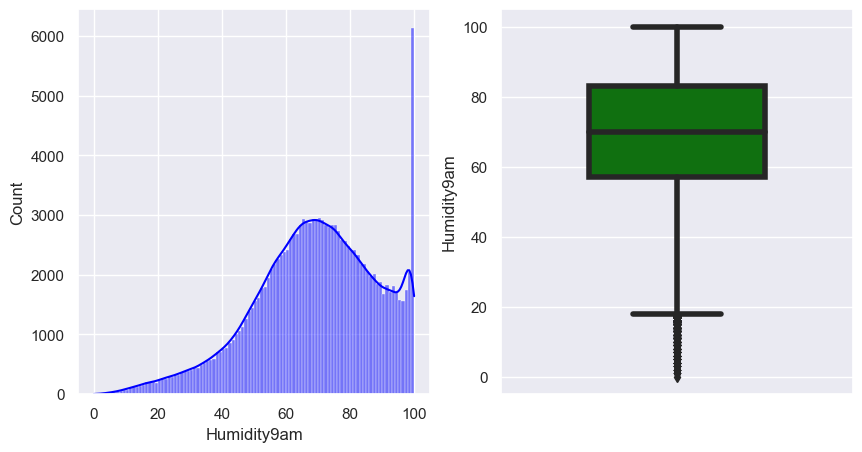

Humidity9am: 
 99.0    3326
70.0    2952
69.0    2940
65.0    2933
68.0    2932
        ... 
4.0       20
3.0       10
2.0        8
1.0        5
0.0        1
Name: Humidity9am, Length: 101, dtype: int64


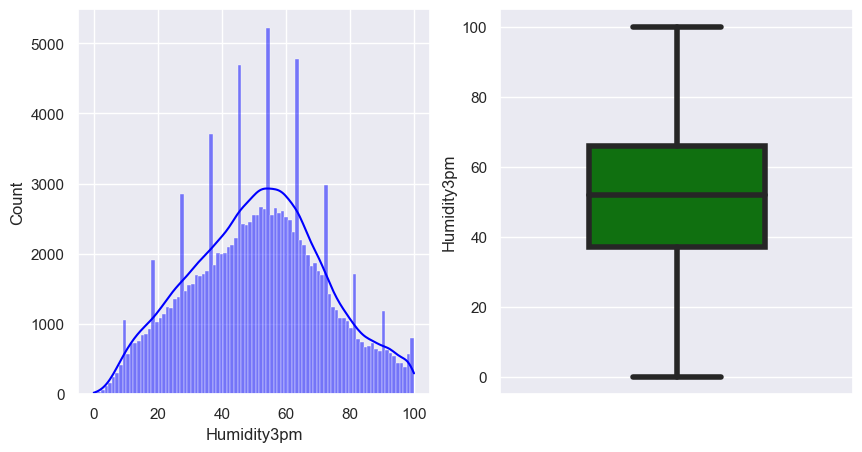

Humidity3pm: 
 52.0    2668
55.0    2654
57.0    2652
53.0    2632
59.0    2612
        ... 
4.0      113
3.0       63
2.0       35
1.0       26
0.0        4
Name: Humidity3pm, Length: 101, dtype: int64


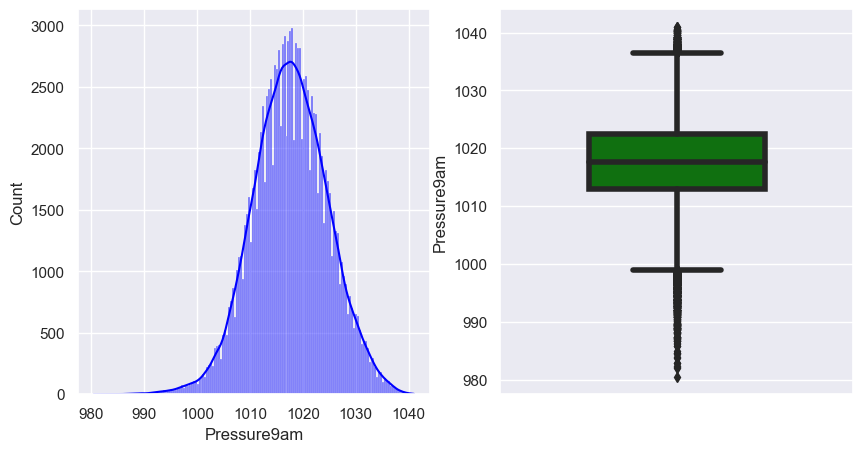

Pressure9am: 
 1016.4    799
1017.9    773
1018.7    754
1017.8    752
1018.0    750
         ... 
986.3       1
988.0       1
987.0       1
1040.0      1
990.6       1
Name: Pressure9am, Length: 545, dtype: int64


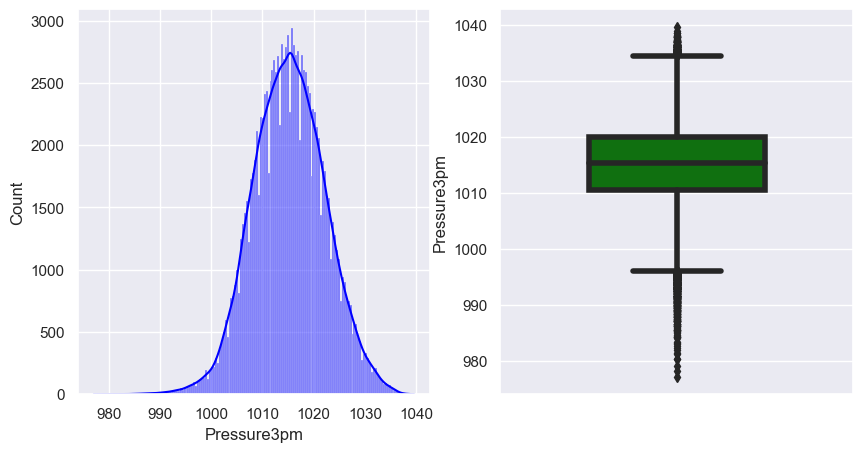

Pressure3pm: 
 1015.5    767
1015.3    763
1015.7    760
1015.6    757
1013.5    747
         ... 
985.3       1
981.2       1
988.4       1
1037.2      1
989.5       1
Name: Pressure3pm, Length: 548, dtype: int64


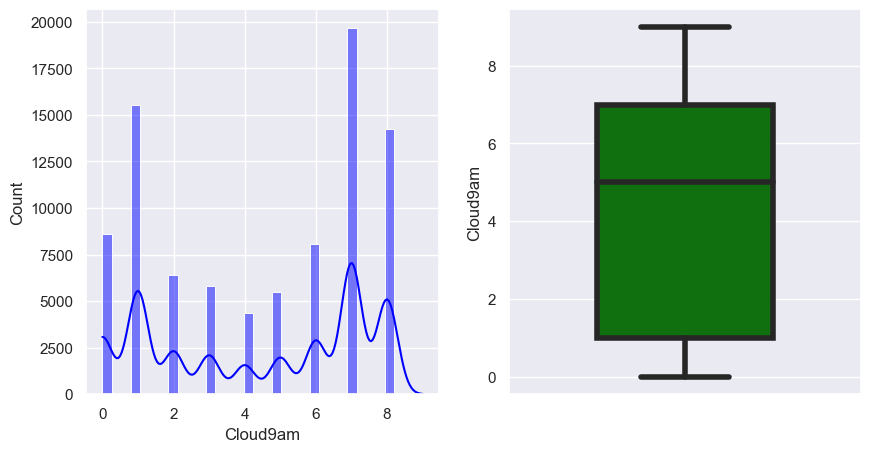

Cloud9am: 
 7.0    19691
1.0    15514
8.0    14224
0.0     8581
6.0     8046
2.0     6424
3.0     5837
5.0     5492
4.0     4351
9.0        2
Name: Cloud9am, dtype: int64


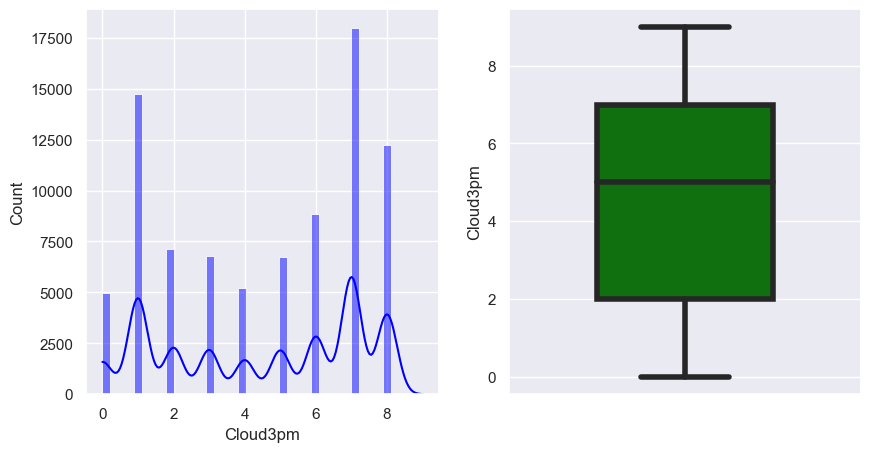

Cloud3pm: 
 7.0    17999
1.0    14759
8.0    12257
6.0     8837
2.0     7128
3.0     6805
5.0     6725
4.0     5230
0.0     4952
9.0        1
Name: Cloud3pm, dtype: int64


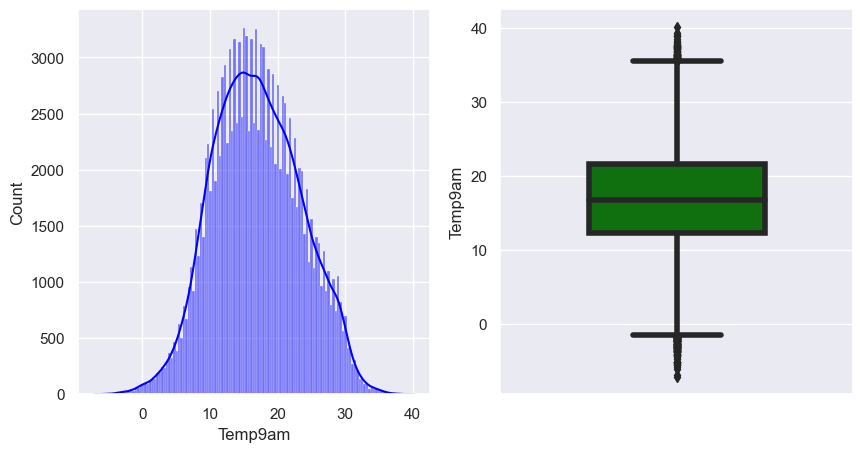

Temp9am: 
  17.0    898
 13.8    875
 14.8    866
 16.0    864
 16.6    851
        ... 
-6.2       1
-4.8       1
-4.0       1
-5.9       1
 38.0      1
Name: Temp9am, Length: 440, dtype: int64


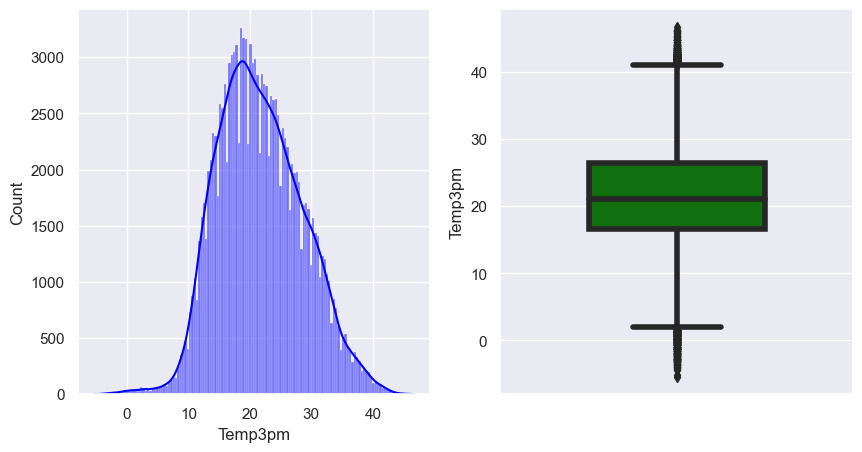

Temp3pm: 
 20.0    862
19.0    852
18.4    847
18.5    846
17.8    841
       ... 
44.9      1
45.9      1
46.2      1
46.7      1
43.8      1
Name: Temp3pm, Length: 500, dtype: int64


In [230]:
# distribution of numerical columns:

df_num=df.select_dtypes(include = np.number)


colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']



def plot_distribution(df_num, var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[var],color="blue",kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var],color="green",orient="v",width=0.5,linewidth=4)
    plt.show()
    var=df[var]
    varvalue=var.value_counts()
    
    print("{}: \n {}".format(var.name,varvalue))


for col in df_num.columns:
    plot_distribution(df_num,col)


In [231]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Text(0.5, 1.0, 'Top 10 Location with Most Rainfall')

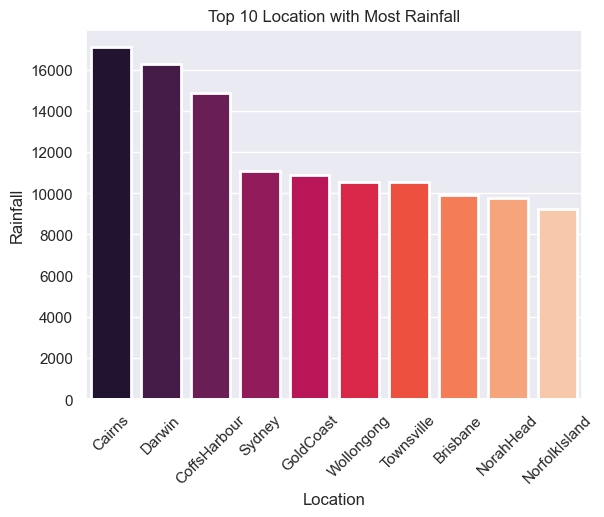

In [232]:
# top 10 location with most rain:

p1=df.groupby("Location")["Rainfall"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=p1.index,y=p1.values,palette="rocket",saturation=1,linewidth=2,
            order=p1.index)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Rainfall")
plt.title("Top 10 Location with Most Rainfall")

Text(0.5, 1.0, 'Top 10 Location with Most Sunshine')

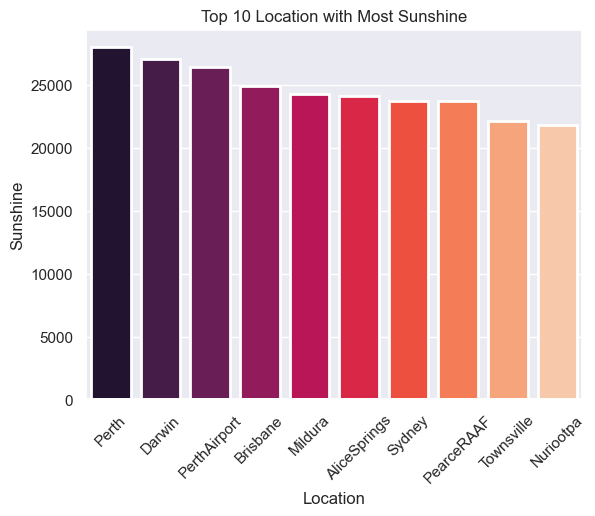

In [233]:
# top 10 location with most sunshine:

p2=df.groupby("Location")["Sunshine"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=p2.index,y=p2.values,palette="rocket",saturation=1,linewidth=2,
            order=p2.index)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Sunshine")
plt.title("Top 10 Location with Most Sunshine")

Text(0.5, 1.0, 'Top 10 Location with Minimum Temperature')

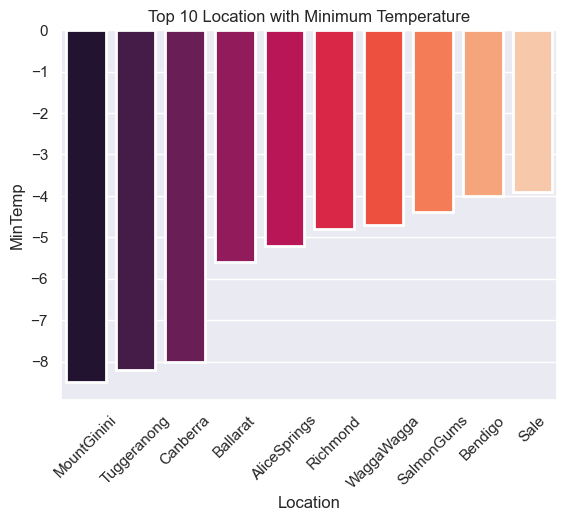

In [234]:
# top 10 location with minimum temperature:

p3=df.groupby("Location")["MinTemp"].min().sort_values(ascending=True).head(10)

sns.barplot(x=p3.index,y=p3.values,palette="rocket",saturation=1,linewidth=2,
            order=p3.index)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("MinTemp")
plt.title("Top 10 Location with Minimum Temperature")

Text(0.5, 1.0, 'Top 10 Location with Maximum Temperature')

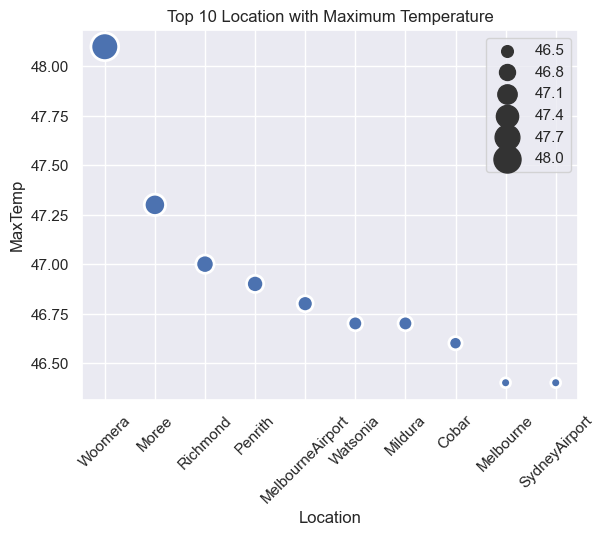

In [235]:
# top 10 location with maximum temperature:

p4=df.groupby("Location")["MaxTemp"].max().sort_values(ascending=False).head(10)

sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=p4.index,y=p4.values,palette="deep",linewidth=2,size=p4.values,sizes=(50,400))
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("MaxTemp")
plt.title("Top 10 Location with Maximum Temperature")

Text(0.5, 1.0, 'Top 10 Location with Most Humidity')

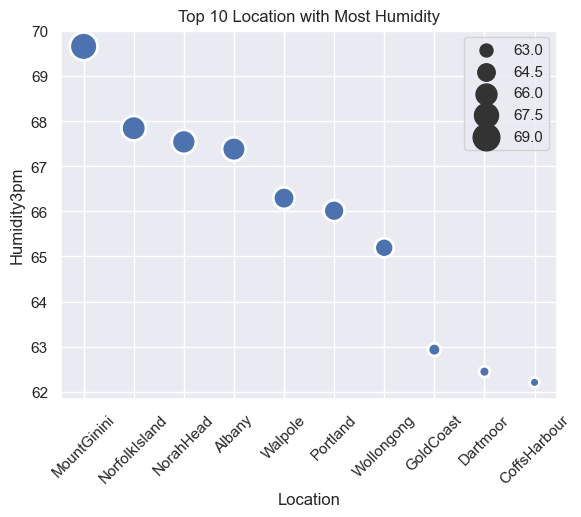

In [236]:
# top 10 location with most humidity: according to 3pm humidity 

p5=df.groupby("Location")["Humidity3pm"].mean().sort_values(ascending=False).head(10)

sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=p5.index,y=p5.values,palette="deep",linewidth=2,size=p5.values,sizes=(50,400))
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Humidity3pm")
plt.title("Top 10 Location with Most Humidity")


Text(0.5, 1.0, 'Top 10 Location with Most WindGustSpeed')

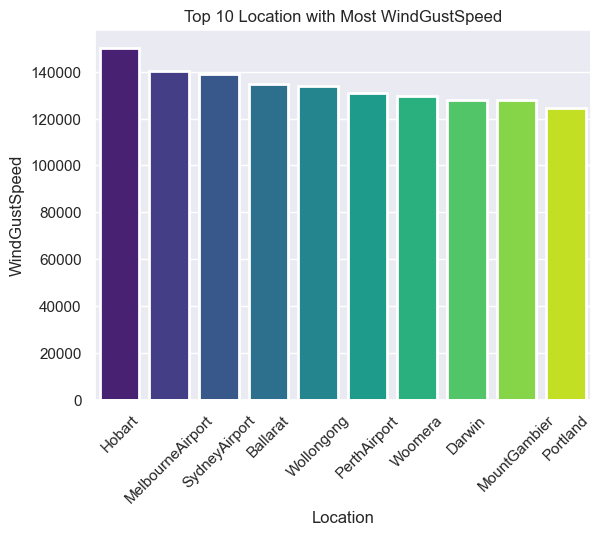

In [237]:
# top 10 location with most wind gust speed: 

p6=df.groupby("Location")["WindGustSpeed"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=p6.index,y=p6.values,palette="viridis",saturation=1,linewidth=2,
            order=p6.index)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("WindGustSpeed")
plt.title("Top 10 Location with Most WindGustSpeed")

Text(0.5, 1.0, 'Top 10 Location with Most WindSpeed9am')

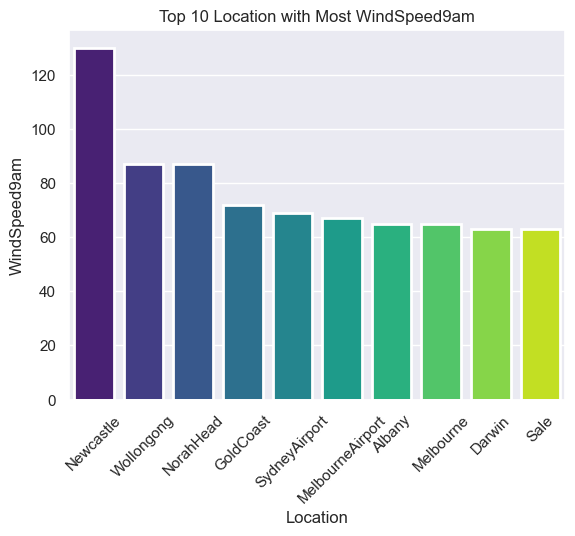

In [238]:
# top 10 location with most wind speed: according to 9am wind speed

p7=df.groupby("Location")["WindSpeed9am"].max().sort_values(ascending=False).head(10)

sns.barplot(x=p7.index,y=p7.values,palette="viridis",saturation=1,linewidth=2,
            order=p7.index)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("WindSpeed9am")
plt.title("Top 10 Location with Most WindSpeed9am")


Text(0.5, 1.0, 'Top 10 Location with Most Pressure')

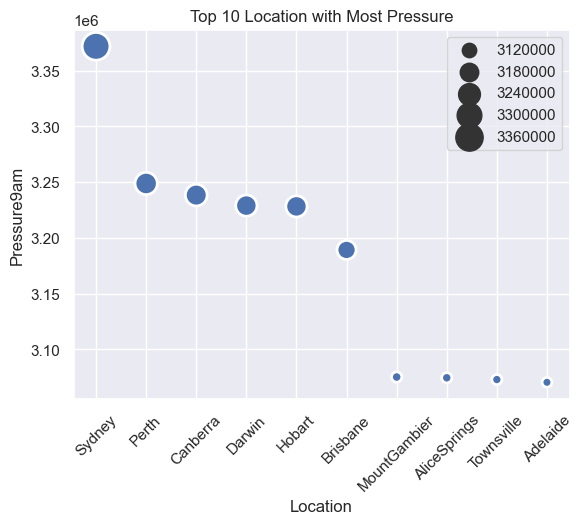

In [239]:
# top 10 location with most pressure: according to 9am pressure

p8=df.groupby("Location")["Pressure9am"].sum().sort_values(ascending=False).head(10)


sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=p8.index,y=p8.values,palette="deep",linewidth=2,size=p8.values,sizes=(50,400))
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Pressure9am")
plt.title("Top 10 Location with Most Pressure")

Text(0.5, 1.0, 'Top 10 Location with Most Cloud')

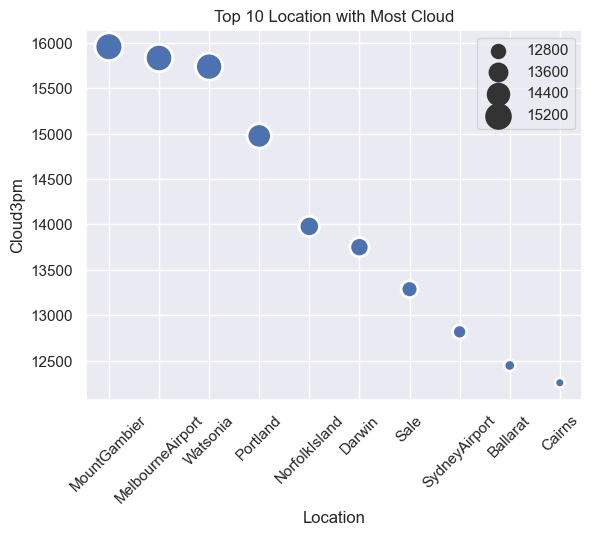

In [240]:
# top 10 location with most cloud: according to 3pm cloud

p9=df.groupby("Location")["Cloud3pm"].sum().sort_values(ascending=False).head(10)


sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=p9.index,y=p9.values,palette="deep",linewidth=2,size=p9.values,sizes=(50,400))
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Cloud3pm")
plt.title("Top 10 Location with Most Cloud")

In [241]:
# Handling null values:

from sklearn.impute import SimpleImputer

se=SimpleImputer()

num_cols=df.select_dtypes(include=np.number).columns

for i in num_cols:
    df[i]=se.fit_transform(df[[i]])
    
df.isnull().sum()



Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

### [6. OUTLIER DETECTON](#6)

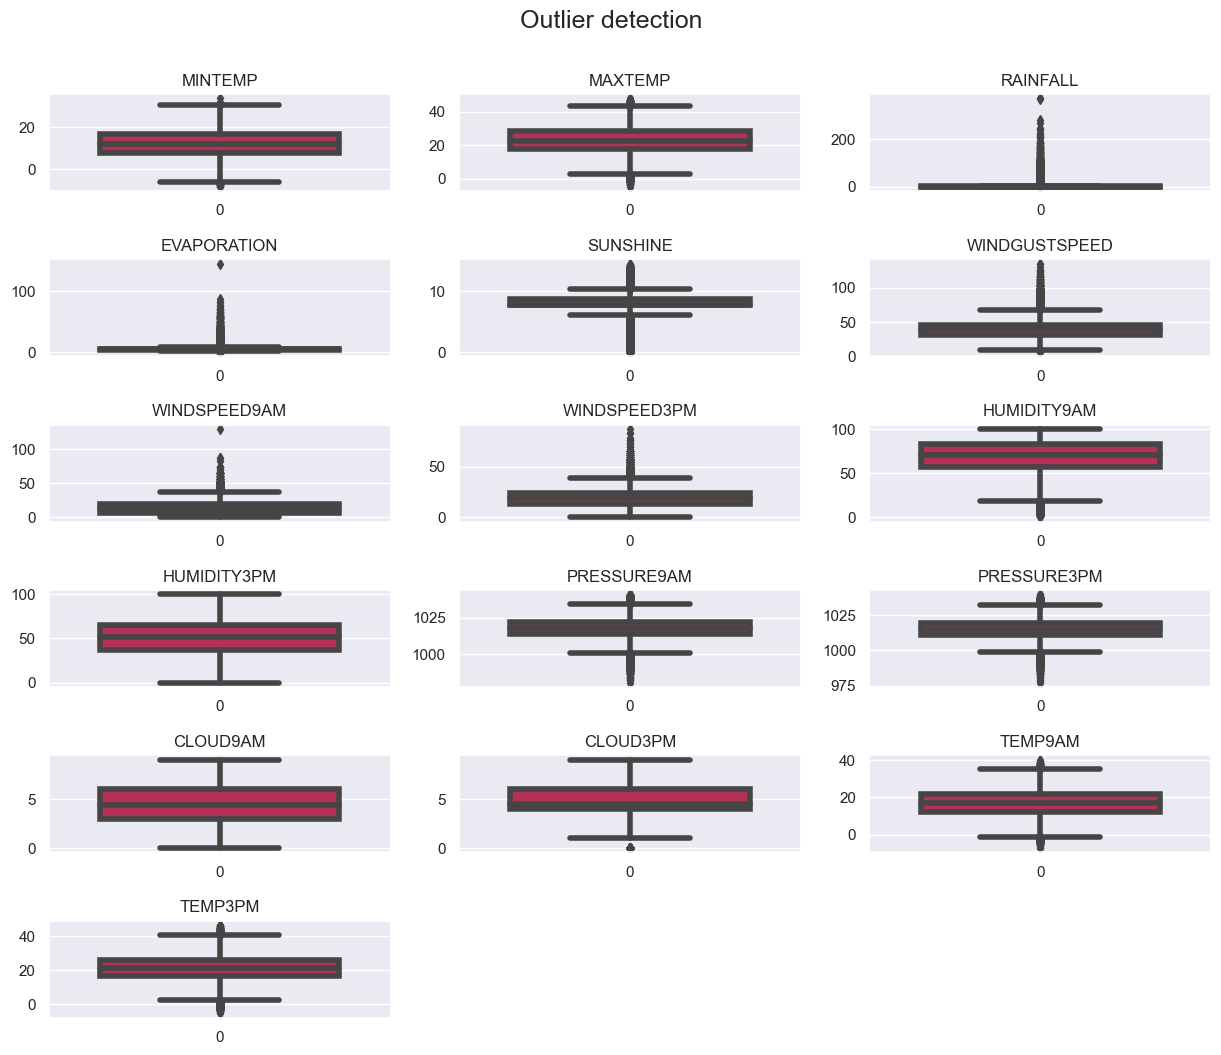

In [242]:
# outlier detection:

df_num=df.select_dtypes(include=["float64","int64"])

# loop through the length of tickers and keep track of index
plt.figure(figsize=(15, 12))
for n, i in enumerate(df_num):
    # add a new subplot iteratively
    ax = plt.subplot(6, 3, n + 1)
    plt.subplots_adjust(hspace=0.7)
    plt.suptitle("Outlier detection", fontsize=18, y=0.95)

    # filter df and plot ticker on the new subplot axis
    sns.boxplot(df_num[i],palette="rocket",orient="v",width=0.7,linewidth=4,ax=ax)

    # chart formatting
    ax.set_title(i.upper())
    ax.set_xlabel("")

In [243]:
# filling outliers with median:



Q1=df[i].quantile(0.25)
Q3=df[i].quantile(0.75)
IQR=Q3-Q1 #interquartile range

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR





((df_num>upper_limit) | (df_num<lower_limit)).sum()

# I will fill with median the columns which have less than 14000 outliers.
#the columns are MinTemp,MaxTemp,sunshine,windspeed3am,temp9am,temp3am

MinTemp            8240
MaxTemp            1320
Rainfall         117719
Evaporation       17021
Sunshine           9465
WindGustSpeed     58199
WindSpeed9am      14362
WindSpeed3pm       4507
Humidity9am      129701
Humidity3pm       98804
Pressure9am      140787
Pressure3pm      140787
Cloud9am          30519
Cloud3pm          26839
Temp9am            1200
Temp3pm             814
dtype: int64

In [244]:
vars=["MinTemp","MaxTemp","Sunshine","WindSpeed3pm","Temp9am","Temp3pm"]

for i in df[vars].columns:
    outlier_lw=(df[i]<lower_limit)
    outlier_upp=(df[i]>upper_limit)
    df[i][outlier_lw]=df[i].mean()  #lower aykırı değerlerin yerine ortalama değerler yazıldı
    df[i][outlier_upp]=df[i].mean() #upper aykırı değerlerin yerine ortalama değerler yazıldı
    

#checking outliers again:
((df[vars]>upper_limit) | (df[vars]<lower_limit)).sum()

MinTemp         0
MaxTemp         0
Sunshine        0
WindSpeed3pm    0
Temp9am         0
Temp3pm         0
dtype: int64

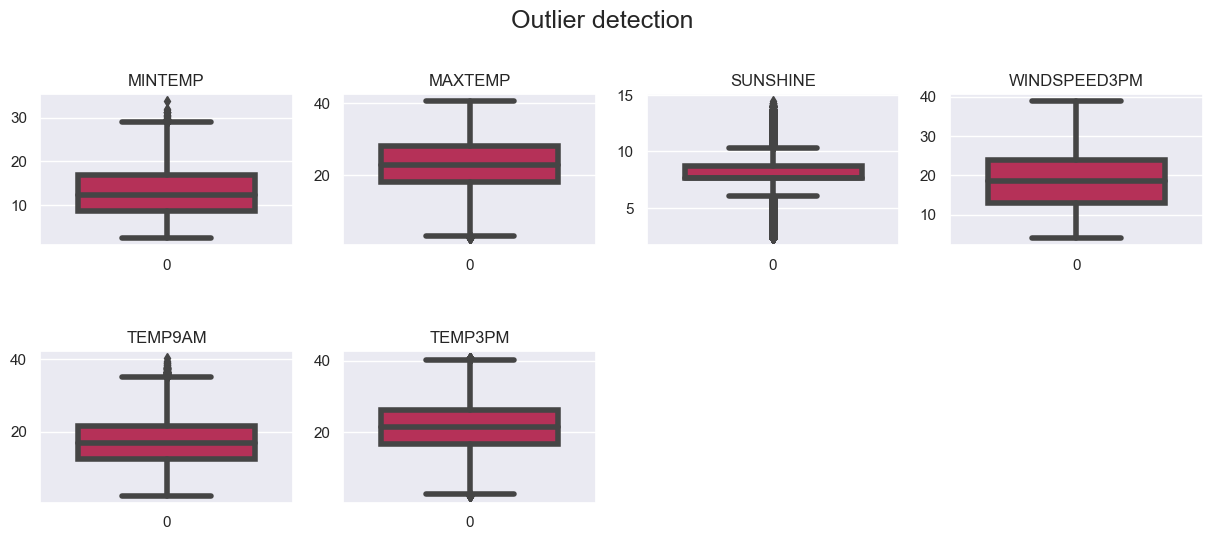

In [245]:
#visualization of outliers:

vars=["MinTemp","MaxTemp","Sunshine","WindSpeed3pm","Temp9am","Temp3pm"]
plt.figure(figsize=(15, 12))
for n, i in enumerate(df[vars]):
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)
    plt.subplots_adjust(hspace=0.7)
    plt.suptitle("Outlier detection", fontsize=18, y=0.95)

    # filter df and plot ticker on the new subplot axis
    sns.boxplot(df[i],palette="rocket",orient="v",width=0.7,linewidth=4,ax=ax)

    # chart formatting
    ax.set_title(i.upper())
    ax.set_xlabel("")

### [7.DATA PREPROCESSING](#7)

In [246]:
# label encoding:

le=LabelEncoder()

df["RainToday"]=le.fit_transform(df["RainToday"])
df["RainTomorrow"]=le.fit_transform(df["RainTomorrow"])
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


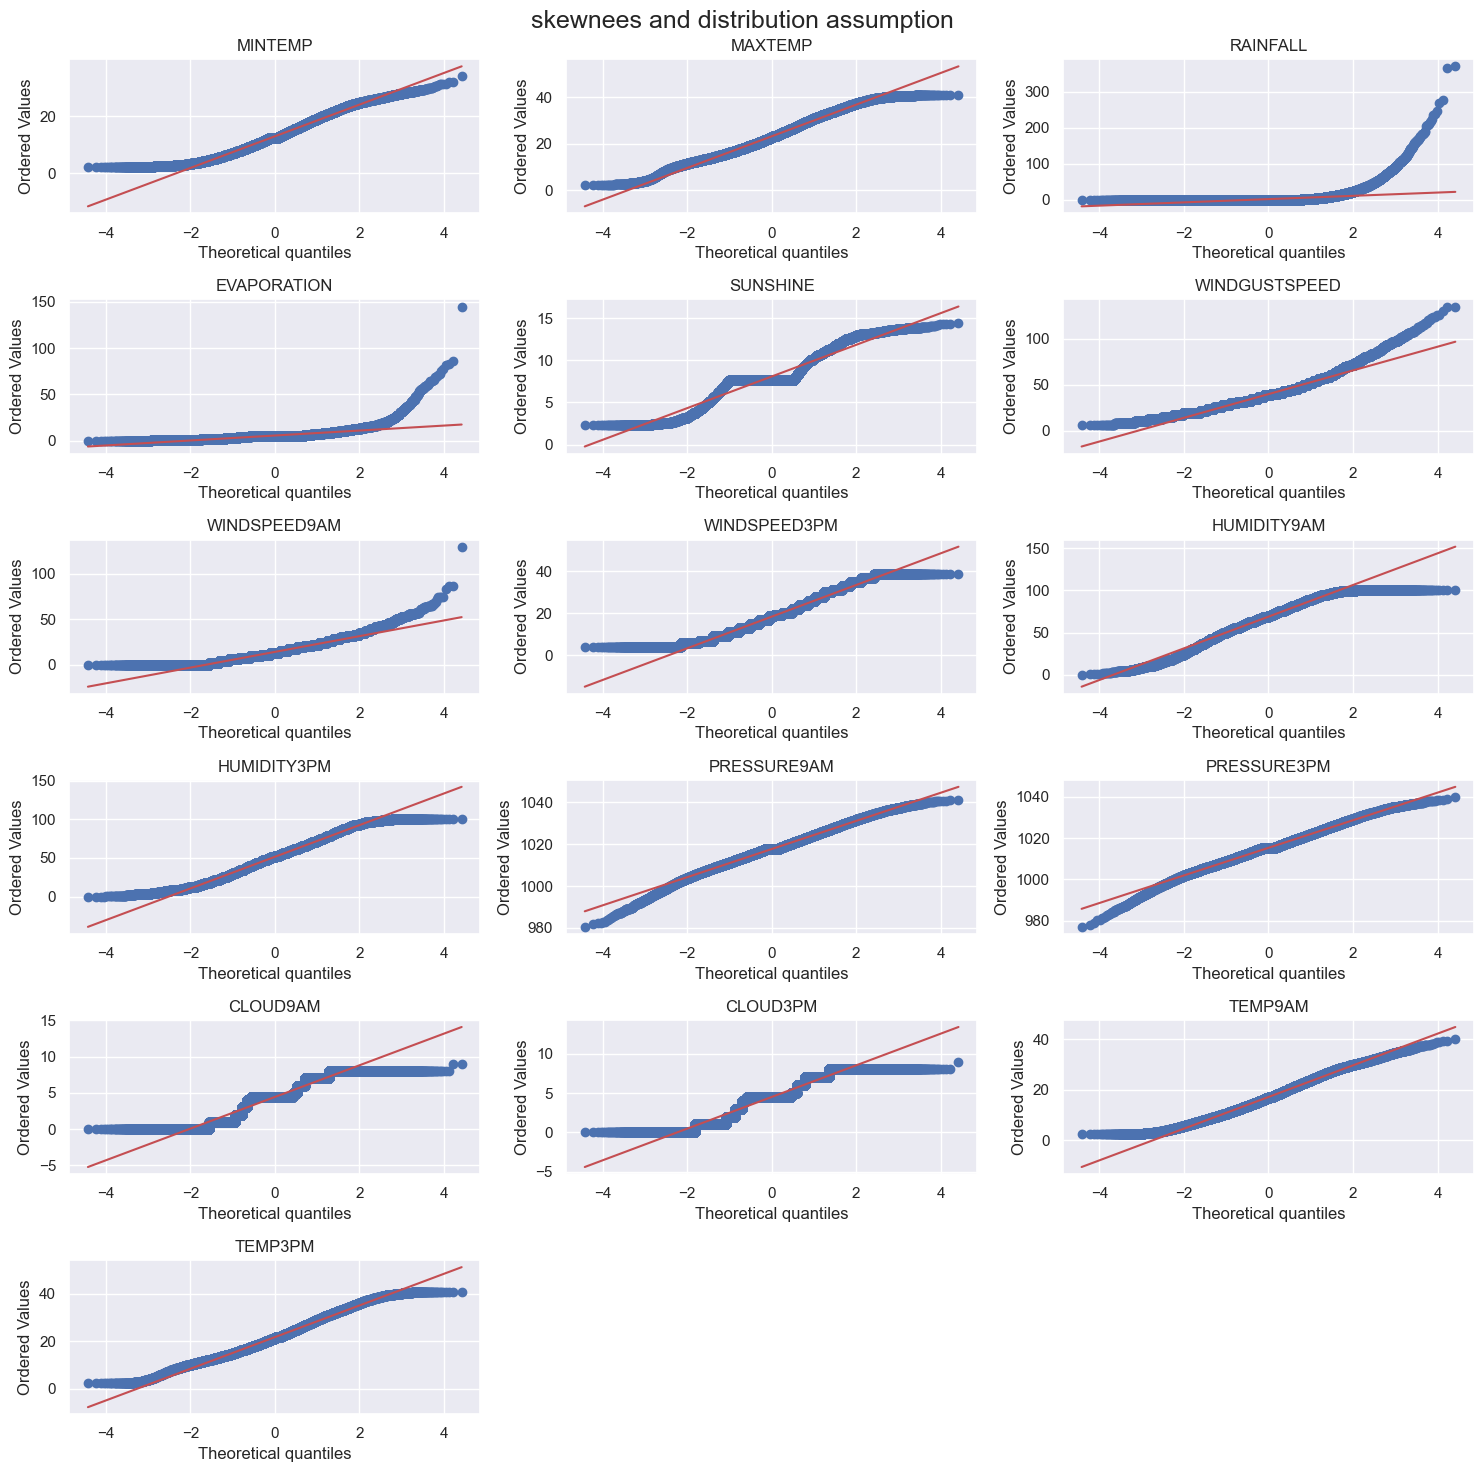

In [247]:
# Checking distribution assumption and skewness of numerical columns

c = 1  # initialize plot counter

fig = plt.figure(figsize = (15,15))
plt.suptitle("skewnees and distribution assumption", fontsize = 18)

for i in num_cols:
    plt.subplot(6, 3, c)
    plt.xlabel(i)       
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(i.upper())
    c = c + 1

plt.tight_layout()
plt.show()

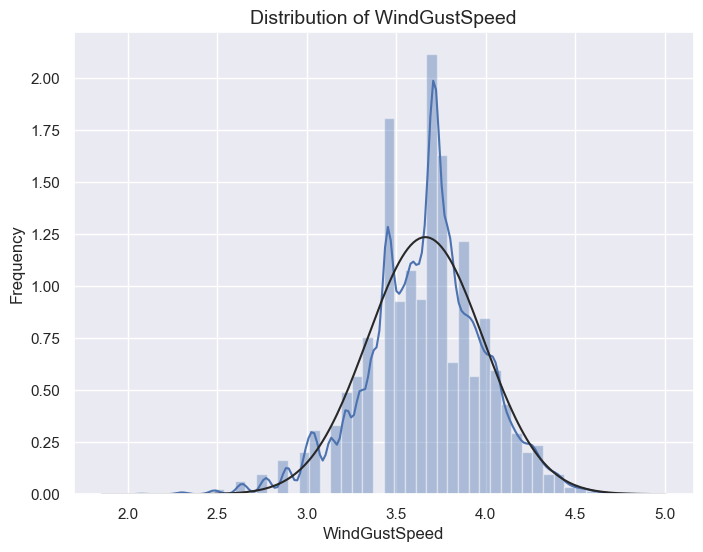

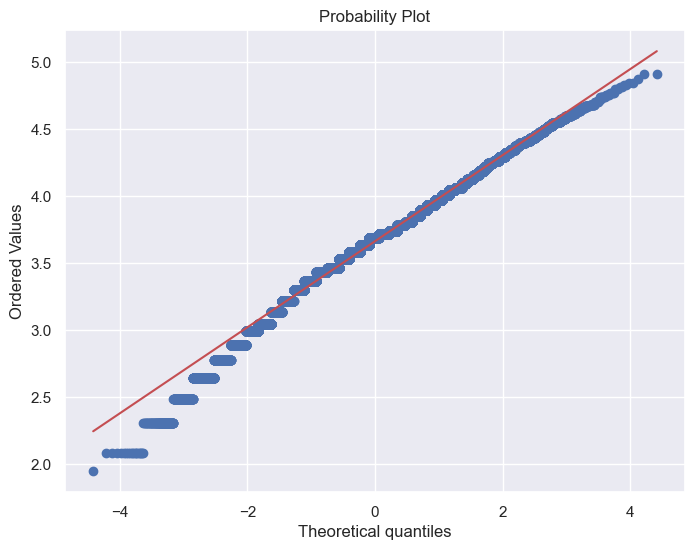

In [248]:



df["WindGustSpeed"] = np.log1p(df["WindGustSpeed"]) #log1p: log(1+x)


sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df["WindGustSpeed"], fit= norm) #fit=norm: normal distribution
plt.title("Distribution of WindGustSpeed", size = 14)
plt.ylabel("Frequency", size = 12)
plt.xlabel("WindGustSpeed",size = 12)
plt.show()


# QQ plot again:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df["WindGustSpeed"], plot = plt)
plt.show()

### [8. MODEL BUILDING](#8)

In [249]:
df.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)
df1=pd.DataFrame(df)

X=df1.drop("RainTomorrow",axis=1)
y=df1["RainTomorrow"].values.reshape(-1,1)
#There is a skewness in windgustspeed,

#so I will apply log transformation to windgustspeed:

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [251]:
sq = Sequential()

# layers

sq.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
sq.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
sq.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
sq.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
sq.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
sq.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = sq.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2)

Epoch 1/100
2640/2640 [==============================] - 6s 2ms/step - loss: 0.5319 - accuracy: 0.7770 - val_loss: 0.4911 - val_accuracy: 0.7775
Epoch 2/100
2640/2640 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8205 - val_loss: 0.4086 - val_accuracy: 0.8273
Epoch 3/100
2640/2640 [==============================] - 4s 2ms/step - loss: 0.4002 - accuracy: 0.8314 - val_loss: 0.3981 - val_accuracy: 0.8321
Epoch 4/100
2640/2640 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8325 - val_loss: 0.3961 - val_accuracy: 0.8336
Epoch 5/100
2640/2640 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8323 - val_loss: 0.3980 - val_accuracy: 0.8319
Epoch 6/100
2640/2640 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8330 - val_loss: 0.3955 - val_accuracy: 0.8319
Epoch 7/100
2640/2640 [==============================] - 4s 1ms/step - loss: 0.3947 - accuracy: 0.8339 - val_loss: 0.3940 - val_ac

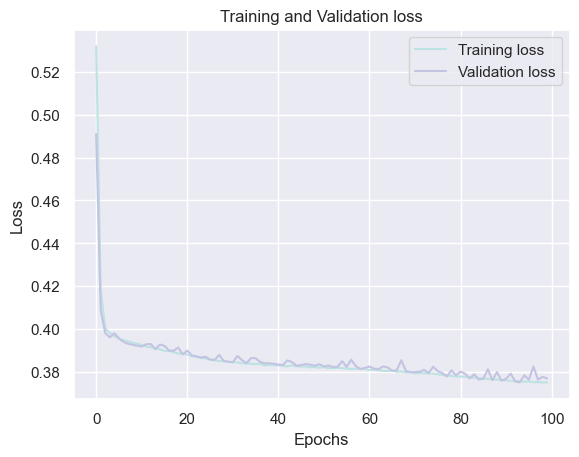

In [252]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

### [9. MODEL EVALUATION](#9)

1100/1100 [==============================] - 1s 889us/step
Accuracy score: 0.8357246356223542
mse:0.1642753643776458
r2 score:0.0485450282564881
mae:0.1642753643776458
rmse:0.4053089739663382
f1 score:0.5471491228070176
classification report:              precision    recall  f1-score   support

           0       0.86      0.95      0.90     27387
           1       0.70      0.45      0.55      7810

    accuracy                           0.84     35197
   macro avg       0.78      0.70      0.72     35197
weighted avg       0.82      0.84      0.82     35197



<Axes: >

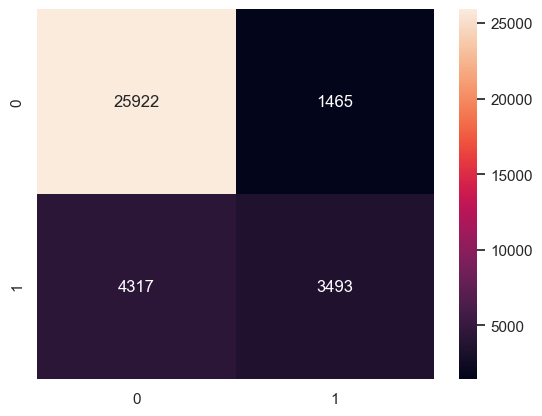

In [253]:
y_pred = sq.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))
print("mse:{}".format(mean_squared_error(y_test, y_pred.round())))
print("r2 score:{}".format(r2_score(y_test, y_pred.round())))
print("mae:{}".format(mean_absolute_error(y_test, y_pred.round())))
print("rmse:{}".format(np.sqrt(mean_squared_error(y_test, y_pred.round()))))
print("f1 score:{}".format(f1_score(y_test, y_pred.round())))
print("classification report:{}".format(classification_report(y_test, y_pred.round())))

sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot=True, fmt=".0f")

### [10. CONCLUSION ](#10)

* After I have done the Exploratory Data Analysis, I have found out that there are outliers in the dataset. I have used the IQR method to fill the outliers with median. And then I have done data visualization to get insight from data. After that I have built ANN model with 5 layers. After training model, I got %83.57 accuracy score from my model. 